### SPAM/HARM sms classification

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [8]:
messages = pd.read_csv("H:/College-Work/Acedemic/ML/data/SMSSpamCollection",sep="\t" , names=['label','message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
len(messages)
#messages.isnull().sum()

5572

In [10]:
t = messages['label'].values
type(t)

numpy.ndarray

### Data cleaning and preprocessing

In [16]:
import re
ps = PorterStemmer()
cleantext=[]

for i in range(len(messages)):
   
    data = messages['message'][i].strip() 
    data = data.lower()
    data = re.sub('[^a-z ]','',data)
    data = re.sub('[ +]',' ',data)
    data = re.sum('[mmm+]','',data)
    data = data.split()
    #print(data)
    data = [ps.stem(word) for word in data if word not in stopwords.words('english')]
    data= ' '.join(data)
    cleantext.append(data)
    
cleantext    

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri questionstd txt ratetc appli over',
 'u dun say earli hor u c alreadi say',
 'nah dont think goe usf live around though',
 'freemsg hey darl week word back id like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'im gonna home soon dont want talk stuff anymor tonight k ive cri enough today',
 'six chanc win cash pound txt csh send cost pday day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim tc wwwdbuknet lccltd pobox ldnwarw',
 'ive search

In [17]:
# Creating Bag of word model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=3000)
X = cv.fit_transform(cleantext).toarray()


In [20]:
X.shape
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
cv.vocabulary_


{'go': 1011,
 'point': 1938,
 'crazi': 615,
 'avail': 196,
 'bugi': 371,
 'great': 1036,
 'world': 2897,
 'la': 1378,
 'buffet': 370,
 'cine': 502,
 'got': 1027,
 'wat': 2805,
 'ok': 1791,
 'lar': 1391,
 'joke': 1309,
 'wif': 2862,
 'oni': 1803,
 'free': 949,
 'entri': 823,
 'wkli': 2885,
 'comp': 549,
 'win': 2869,
 'fa': 865,
 'cup': 635,
 'final': 907,
 'tkt': 2600,
 'st': 2438,
 'may': 1577,
 'text': 2561,
 'receiv': 2094,
 'questionstd': 2051,
 'txt': 2661,
 'appli': 143,
 'over': 1834,
 'dun': 785,
 'say': 2204,
 'earli': 789,
 'hor': 1139,
 'alreadi': 95,
 'nah': 1722,
 'dont': 765,
 'think': 2575,
 'goe': 1015,
 'usf': 2726,
 'live': 1453,
 'around': 165,
 'though': 2581,
 'freemsg': 951,
 'hey': 1104,
 'darl': 659,
 'week': 2825,
 'word': 2893,
 'back': 212,
 'id': 1188,
 'like': 1438,
 'fun': 969,
 'still': 2460,
 'tb': 2537,
 'xxx': 2954,
 'std': 2454,
 'chg': 484,
 'send': 2243,
 'rcv': 2078,
 'even': 837,
 'brother': 352,
 'speak': 2411,
 'treat': 2636,
 'aid': 68,
 'per':

In [24]:
# print bag of word model
df = pd.DataFrame(X,columns=cv.get_feature_names())
df.head()

,aah,aathilov,aathiwher,abi,abil,abiola,abj,abl,abt,abta,...,your,youv,yr,yummi,yun,yunni,yuo,yup,zed,zoe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
t = messages['label']
y=messages['label'].replace(["ham","spam"],(0,1)).values
y
#type(y)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

#### split the data

In [24]:

from sklearn.model_selection import train_test_split
x_train, x_test ,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state=0)


In [25]:
print(x_train[1])
print(y_train[1])

[0 0 0 ... 0 0 0]
0


### apply Multinomial NB

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)


In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)

print("Accuracy is %.2f" %accuracy_score(y_test,y_pred))

Accuracy is 0.98


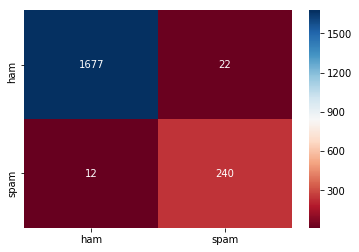

In [30]:

import seaborn as sns
label = ['ham','spam']
sns.heatmap(cm,cmap='RdBu',annot=True ,fmt='d',xticklabels=label,yticklabels=label)

In [40]:
# for new data point
sms=["aah aah customer you may now claim your FREE LAPTOP"]
#sms=np.array(sms).reshape(1,-1)
newarr=cv.transform(sms)
#print(newarr)
#t = np.array(newarr).reshape(1,-1)

y_new = classifier.predict(newarr)
y_new

array([1], dtype=int64)